<a href="https://colab.research.google.com/github/Kendi-Nceene/Sales-Prediction/blob/main/Sales_Prediction_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Prediction


# 1. Defining the Question

# a) Specifying the Question

> Building a supervised machine learning algorithm to predict sales.

# b) Defining the Metrics for Success¶

> Building a machine learning algorithm with the lowest RMSE.

# c) Understanding the context

# d) Recording the Experimental Design

> 1. Problem Definition

> 2. Data Sourcing

> 3. Check the Data

> 4. Perform Data Cleaning

> 5. Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

> 6. Implement the Solution

> 7. Challenge the Solution

> 8. Follow up Questions

> 9. Conclusions

> 10. Recommendations

# 2. Importing Libraries

In [281]:
# Lets import relevant libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Data Wrangling
## a) Gathering Data

In [282]:
# Lets create a function that reads data

def read(data):
    return pd.read_csv(data)

In [283]:
# Lets read the  train dataset

sales_traindf = read('train.csv')
sales_traindf.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3327,FDQ46,7.510,Low Fat,0.104024,Snack Foods,112.4544,OUT045,2002,NaN,Tier 2,Supermarket Type1,2013.3792
1381,DRN59,15.000,Low Fat,0.064241,Hard Drinks,45.2060,OUT049,1999,Medium,Tier 1,Supermarket Type1,792.3020
7626,NCD54,NaN,Low Fat,0.050791,Household,142.7786,OUT019,1985,Small,Tier 1,Grocery Store,144.4786
6215,NCW54,7.500,low fat,0.096413,Household,55.3588,OUT046,1997,Small,Tier 1,Supermarket Type1,1030.6584
983,FDC26,10.195,Low Fat,0.126898,Canned,110.6886,OUT018,2009,Medium,Tier 3,Supermarket Type2,1223.0746


In [284]:
# Lets preview a sample of the dataset
sales_testdf = read('test.csv')
sales_testdf.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1254,FDY03,17.60,Regular,0.076107,Meat,113.0202,OUT035,2004,Small,Tier 2,Supermarket Type1
416,FDG45,8.10,Low Fat,0.000000,Fruits and Vegetables,213.2902,OUT049,1999,Medium,Tier 1,Supermarket Type1
5126,FDN25,NaN,Regular,0.060879,Breakfast,56.1588,OUT027,1985,Medium,Tier 3,Supermarket Type3
4057,FDN22,NaN,Regular,0.000000,Snack Foods,252.6724,OUT027,1985,Medium,Tier 3,Supermarket Type3
760,FDY56,16.35,Regular,0.062538,Fruits and Vegetables,226.5062,OUT045,2002,NaN,Tier 2,Supermarket Type1


## b) Assessing Data

In [285]:
# Lets preview the shape of the datasets
print('The train dataset had',sales_traindf.shape,'rows and columns respectively')
print('The test dataset had',sales_testdf.shape,'rows and columns respectively')

The train dataset had (8523, 12) rows and columns respectively
The test dataset had (5681, 11) rows and columns respectively


In [286]:
# Lets preview the columns of each dataset since the test dataset seems to have one column less
print(sales_traindf.info())
print('..'*50)
print(sales_testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
........................................

> The missing column is our target variable which is sales which the machine needs to predict.

> All the columns have correct datatpes

In [287]:
# Lets check for missing values in both the datasets
print('The percentage of missing values in the train data were: ')
print(sales_traindf.isna().sum()/len(sales_traindf)*100)
print('..'*50)
print('The percentage of missing values in the train data were ')
print(sales_testdf.isna().sum()/len(sales_traindf)*100)

The percentage of missing values in the train data were: 
Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64
....................................................................................................
The percentage of missing values in the train data were 
Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year   

> Two columns in each dataset had missing values. We'll perform some cleaning procedures

In [288]:
print('The percentage of duplicate values in the train data was: ')
print(sales_traindf.duplicated().sum()/len(sales_traindf)*100)
print('..'*50)
print('The percentage of duplicate values in the train data was ')
print(sales_testdf.duplicated().sum()/len(sales_traindf)*100)

The percentage of duplicate values in the train data was: 
0.0
....................................................................................................
The percentage of duplicate values in the train data was 
0.0


In [289]:
# Check Cardinality
# We will use a for loop function to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset

def cardinal(data):
    print('Cardinality of the dataset columns : \n')
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')

print('Train Dataset')
cardinal(sales_traindf)
print('..'*50)
print('Test Dataset')
cardinal(sales_testdf)


Train Dataset
Cardinality of the dataset columns : 

Item_Identifier : 1559
Item_Weight : 415
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493
....................................................................................................
Test Dataset
Cardinality of the dataset columns : 

Item_Identifier : 1543
Item_Weight : 410
Item_Fat_Content : 5
Item_Visibility : 5277
Item_Type : 16
Item_MRP : 4402
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [290]:
print('Fat Content')
print(sales_traindf['Item_Fat_Content'].unique())
print('----------------------------------------------------')
print('Item Type')
print(sales_traindf['Item_Type'].unique())
print('----------------------------------------------------')
print('Outlet Size')
print(sales_traindf['Outlet_Size'].unique())
print('----------------------------------------------------')
print('Outlet location Type')
print(sales_traindf['Outlet_Location_Type'].unique())


Fat Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------------------------------
Item Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------------------
Outlet Size
['Medium' nan 'High' 'Small']
----------------------------------------------------
Outlet location Type
['Tier 1' 'Tier 3' 'Tier 2']


> We realize that the fat content column has some inconsistencies. reg and regular, lowfat and lf

> The same column has some words in caps while others are in lowwer cases.

In [291]:
# Lets check for the summary statistics
print('Train Dataset')
print(sales_traindf.describe())
print('Test Dataset')
print(sales_testdf.describe())

Train Dataset
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
Test Dataset
       Item_Weight

In [292]:
sales_traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


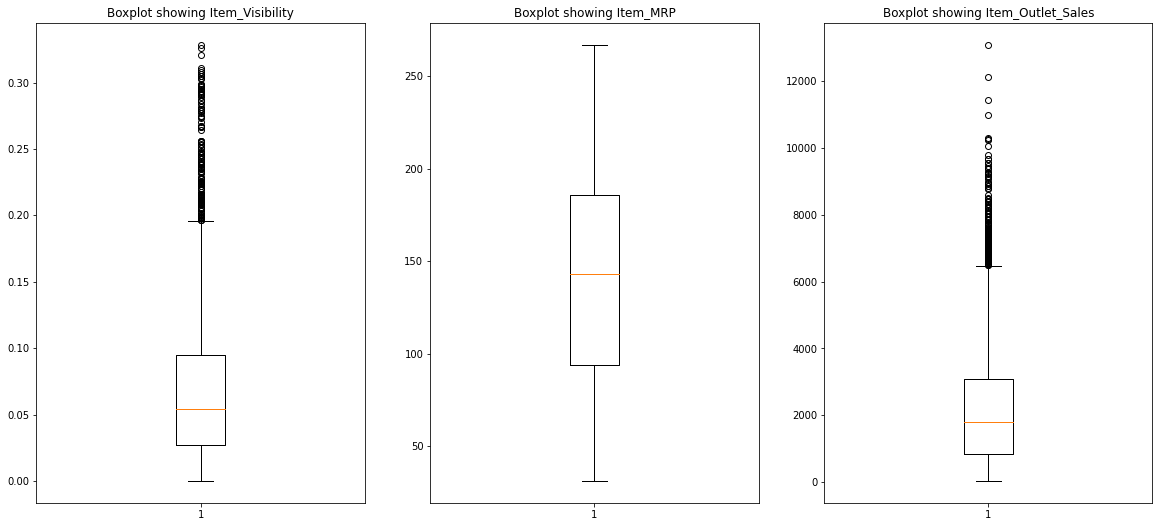

In [293]:
# checking for outliers
# define a function that plots boxplots to visualize outliers

def outliers ():
    "making a dictionary for numerical columns"
    columns_dict = {'Item_Visibility': 1, 'Item_MRP': 2, 'Item_Outlet_Sales': 3}
    plt.figure(figsize=(20,30))
    for variable,i in columns_dict.items():
      plt.subplot(3,3,i);
      plt.boxplot(sales_traindf[variable]);
      plt.title(f"Boxplot showing {variable}");
    plt.show()
outliers()

(a) Some columns have outliers.

(b) We need to assess the outliers.

In [294]:
# Lets preview the outliers of the sales column
sales_traindf.query('Item_Outlet_Sales > 6500')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,NaN,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,NaN,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,NaN,Tier 2,Supermarket Type1,7588.1226


> Outliers shall be retained as they contain pertinent and real information.

## c) Cleaning

> 1. Some columns have missing values. We will need to deal with the missing values.

> 2. The item fat content column had some inconsistencies.

> 3. Lets lower the cases of all columns for easier computation. 

> 4. Lets convertthe datatype of the year column from integer to datetime.

# Issue 1 : 

## Define:

> Remove the missing values since they were a small percentage.

# Code

In [295]:
# Lets drop rows with missing values in each column
sales_traindf.dropna(inplace = True)
sales_testdf.dropna(inplace = True)

# Test

In [296]:
# Lets check for missing values in both the datasets
print('The percentage of missing values in the train data were: ')
print(sales_traindf.isna().sum()/len(sales_traindf)*100)
print('..'*50)
print('The percentage of missing values in the train data were ')
print(sales_testdf.isna().sum()/len(sales_traindf)*100)

The percentage of missing values in the train data were: 
Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64
....................................................................................................
The percentage of missing values in the train data were 
Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: flo

# Issue 2 :

> Lets deal with incosistencies in the fat content column.

# Code

In [297]:
# Lets preview an array of the unique features in te column
sales_traindf.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [298]:
# Lets preview an array of the unique features in te column
sales_testdf.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], dtype=object)

In [299]:
# The train dataset
sales_traindf.Item_Fat_Content.replace({'Low Fat': 'low fat','Regular':'regular','reg':'regular','LF':'low fat'},inplace = True)

In [300]:
# # The test dataset
sales_testdf.Item_Fat_Content.replace({'Low Fat': 'low fat','Regular':'regular','reg':'regular','LF':'low fat'},inplace = True)

# Test

In [301]:
# Lets preview the rows again
print(sales_traindf.Item_Fat_Content.unique())
print('..'*20)
print(sales_testdf.Item_Fat_Content.unique())

['low fat' 'regular']
........................................
['low fat' 'regular']


# Issue 3 :

> Lets lower the cases of all columns for easier computation.

# Code

In [302]:
# lets preview the columns
sales_traindf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [303]:
# Lets rename the columns of all rows
# We'll use the lambda funtion to strip off white spaces

sales_traindf.rename(columns = lambda x : x.lower(),inplace =True)

sales_testdf.rename(columns = lambda x : x.lower(),inplace =True)



# Test

In [304]:
# Lets preview the columns
sales_traindf.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [305]:
sales_testdf.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

# Issue 4:

> Lets convert the datatype of the year column from integer to datetime.

# Code

In [306]:
# Lets convert the data type 
sales_traindf['outlet_establishment_year']= pd.to_datetime(sales_traindf['outlet_establishment_year'])
sales_testdf['outlet_establishment_year']= pd.to_datetime(sales_testdf['outlet_establishment_year'])

# Test

In [307]:
print(sales_traindf.dtypes)
print('..'*40)
print(sales_testdf.dtypes)

item_identifier                      object
item_weight                         float64
item_fat_content                     object
item_visibility                     float64
item_type                            object
item_mrp                            float64
outlet_identifier                    object
outlet_establishment_year    datetime64[ns]
outlet_size                          object
outlet_location_type                 object
outlet_type                          object
item_outlet_sales                   float64
dtype: object
................................................................................
item_identifier                      object
item_weight                         float64
item_fat_content                     object
item_visibility                     float64
item_type                            object
item_mrp                            float64
outlet_identifier                    object
outlet_establishment_year    datetime64[ns]
outlet_size              

# 4. Exploratory Data Analysis

## (a) Univariate Analysis

In [308]:
sales_traindf.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,556.6088


<Figure size 1000x300 with 0 Axes>

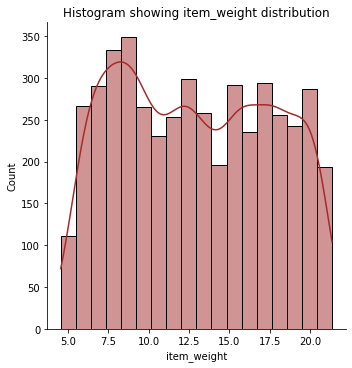

<Figure size 1000x300 with 0 Axes>

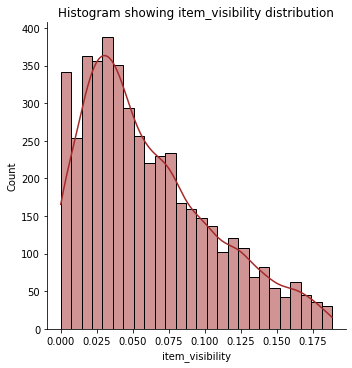

<Figure size 1000x300 with 0 Axes>

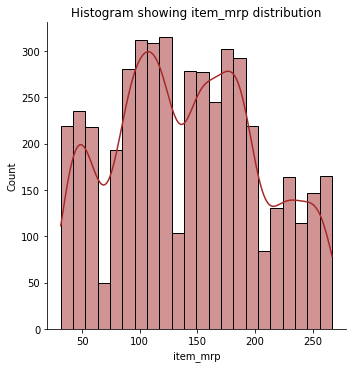

<Figure size 1000x300 with 0 Axes>

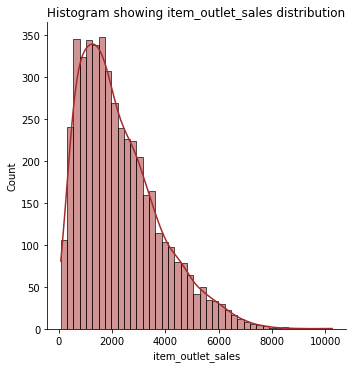

In [309]:
#Plotting histrograms for categorical values
# columns_dict = ['unit_price','tax','cogs','gross_income','total']

def histogram (v):
    columns_dict = ['item_weight','item_visibility','item_mrp','item_outlet_sales']
    for i in columns_dict:
      plt.figure(figsize = (10,3), dpi=100)
      sns.displot(v[i], kde = True, color = 'brown')
      plt.title(f"Histogram showing {i} distribution", color = 'Black')
      plt.show()

histogram (sales_traindf);

In [310]:
# Lets check for the value counts of the outlet_size
sales_traindf['outlet_size'].value_counts()

Small     1860
Medium    1858
High       932
Name: outlet_size, dtype: int64

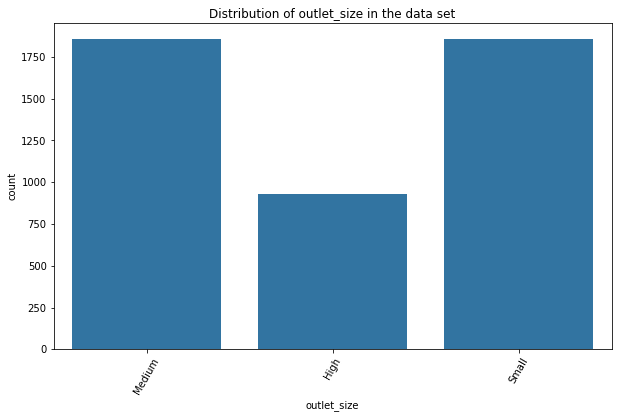

In [311]:
# Lets plot a countplot for the column

base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x = sales_traindf['outlet_size'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of outlet_size in the data set');

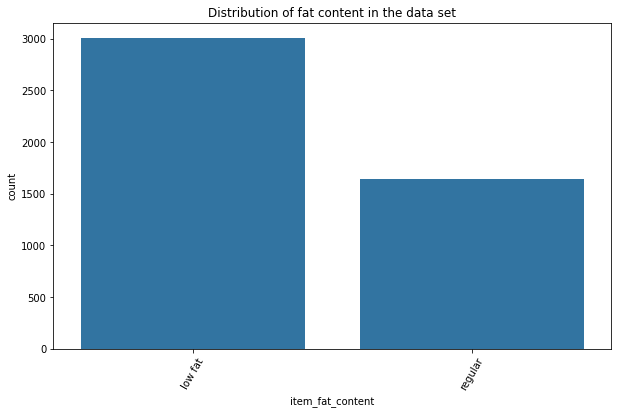

In [312]:
# Lets plot a countplot for the column

base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x = sales_traindf['item_fat_content'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of fat content in the data set');

In [313]:
sales_traindf.outlet_type.value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: outlet_type, dtype: int64

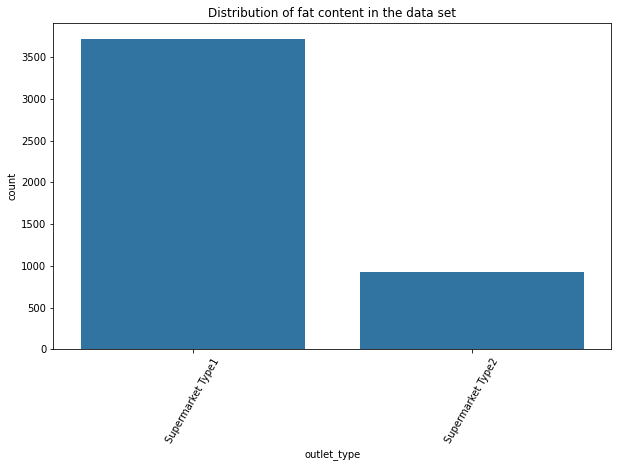

In [314]:
# Lets plot a countplot for the column

base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x = sales_traindf['outlet_type'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of fat content in the data set');

## Bivariate Analysis

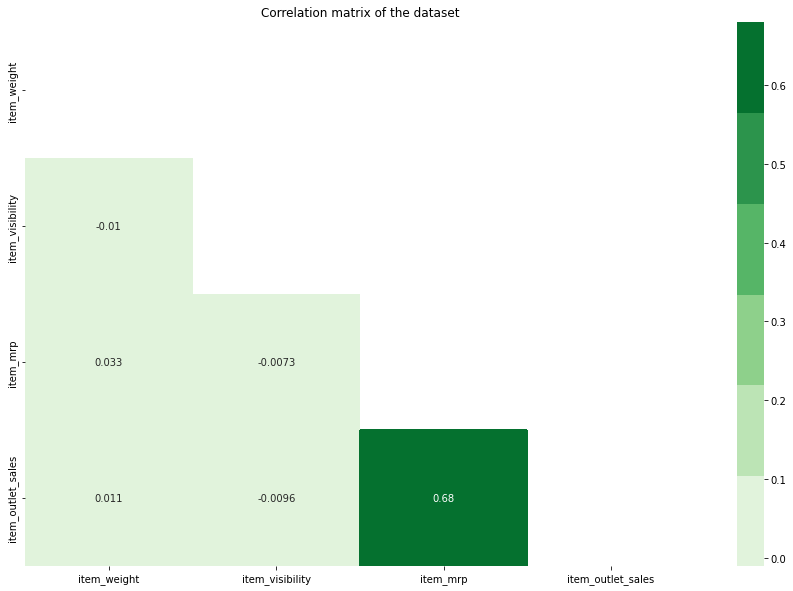

In [315]:
## Plotting a correlation matrix

def Cormatrix (h):
      plt.subplots(figsize=(15,10))
      mask = np.triu(np.ones_like(h.corr()))
      colormap = sns.color_palette("Greens")
      dataplot = sns.heatmap(h.corr(), cmap=colormap, annot=True, mask=mask)
      dataplot.set_title("Correlation matrix of the dataset")
      plt.show()

Cormatrix (sales_traindf)

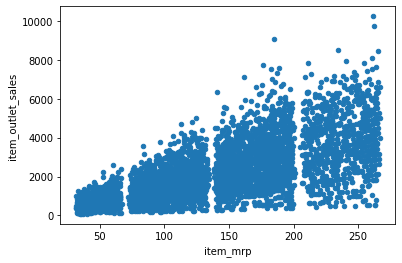

In [316]:
# Lets plot scatter plots of the highly correlated features 

ax = sales_traindf.plot.scatter(x="item_mrp", y="item_outlet_sales")

In [317]:
sales_traindf.head(3)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700


# Pre-processing

## (a) Label Encoding

In [318]:
# Preview a sample
sales_traindf.sample(2)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
674,NCB18,19.6,low fat,0.041459,Household,89.6514,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,1239.7196
6457,FDW50,13.1,low fat,0.075886,Dairy,165.1158,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,1504.0422


In [319]:
# Lets label encode
le = LabelEncoder()

objects = [col for col in sales_traindf.columns if sales_traindf[col].dtype == 'object']
objects

['item_identifier',
 'item_fat_content',
 'item_type',
 'outlet_identifier',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [320]:
# Lets label encode categorical varibles
categorical = ['item_fat_content','item_type','outlet_size','outlet_location_type','outlet_type']

for col in categorical :
    sales_traindf[col] = le.fit_transform(sales_traindf[col])

In [321]:
# Preview a sample
sales_traindf.head(3)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1970-01-01 00:00:00.000001999,1,0,0,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,1970-01-01 00:00:00.000002009,1,2,1,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1970-01-01 00:00:00.000001999,1,0,0,2097.2700


## Splitting the dataset


In [322]:
# Linear regression
X = sales_traindf.drop(['item_identifier','outlet_identifier','item_outlet_sales','outlet_establishment_year'],1)
y = sales_traindf['item_outlet_sales']

In [323]:
# Crafting of the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.2)

## Standardization

In [324]:
# Lets use standardization 
sc= StandardScaler()

sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.5756752 , -0.73900924,  1.84835355, ..., -0.26809708,
         1.1249453 ,  2.00843957],
       [ 1.03357788,  1.35316305,  2.14114477, ...,  1.07058899,
        -1.10635116, -0.49789897],
       [ 0.09647473, -0.73900924, -0.63465873, ..., -0.26809708,
        -1.10635116, -0.49789897],
       ...,
       [ 1.42758715, -0.73900924, -0.59626072, ..., -0.26809708,
        -1.10635116, -0.49789897],
       [ 0.92708888,  1.35316305,  1.43648482, ...,  1.07058899,
         0.00929707, -0.49789897],
       [ 0.94838668, -0.73900924, -0.89465211, ...,  1.07058899,
        -1.10635116, -0.49789897]])

# Modeling

## Base Model :

### Decision Tree Regressor

In [325]:
# Decision Tree 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

In [326]:
# Building the model

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 10,min_samples_split = 2)

# Fitting the model

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [327]:
# Predict based on the model we've trained
y_preddt = forest.predict(X_test)

# creating a dataframe of the predicted and actuals
comparison_framedt = pd.DataFrame({'Actual': y_test, 'Predicted': y_preddt})
comparison_framedt.head(5)

,Actual,Predicted
5785,1584.6040,1822.823888
3415,1566.6274,2077.749842
1793,194.4136,703.809001
2701,2465.4574,1748.782222
7118,7190.6400,4221.353824


In [328]:
# Summary statistics of the dataframe
comparison_framedt.describe()

,Actual,Predicted
count,1395.000000,1395.000000
mean,2234.214321,2269.212507
std,1489.723391,1048.141043
min,69.243200,364.670818
25%,1100.567400,1429.972058
50%,1895.532600,2226.979148
75%,3103.959600,3050.112463
max,9069.527600,5271.953558


In [329]:
# Lets now evaluate our model
model.score(X_test, y_test)

-0.15789480992778415

In [330]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preddt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preddt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preddt)))

Mean Absolute Error: 813.8319783123357
Mean Squared Error: 1231152.7026874973
Root Mean Squared Error: 1109.5732074484754


# Challenging the Base Model.

## Random Forest Regressor

In [331]:
from sklearn.ensemble import RandomForestRegressor

# Building the model
forest = RandomForestRegressor()

# Lets fit the model to our dataset
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# Creating a dataframe of the actuals and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)

,Actual,Predicted
5785,1584.6040,2093.574810
3415,1566.6274,2230.663030
1793,194.4136,766.202640
2701,2465.4574,1797.413654
7118,7190.6400,4573.446780


In [332]:
# lets investigate the summary statistics of the df
comparison_frame.describe()

,Actual,Predicted
count,1395.000000,1395.000000
mean,2234.214321,2266.451680
std,1489.723391,1097.249150
min,69.243200,257.751154
25%,1100.567400,1386.977915
50%,1895.532600,2176.626702
75%,3103.959600,3044.540279
max,9069.527600,6266.556206


In [333]:
# Lets evaluate the model
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 844.7569312946237
Mean Squared Error: 1338342.7645235143
Root Mean Squared Error: 1156.8676521208095


## Hyperparameter Tuning

In [334]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 170, random_state= 25, min_samples_split = 15, max_depth= 10)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)

,Actual,Predicted
5785,1584.6040,1822.823888
3415,1566.6274,2077.749842
1793,194.4136,703.809001
2701,2465.4574,1748.782222
7118,7190.6400,4221.353824


In [335]:
comparison_frame.describe()

,Actual,Predicted
count,1395.000000,1395.000000
mean,2234.214321,2269.212507
std,1489.723391,1048.141043
min,69.243200,364.670818
25%,1100.567400,1429.972058
50%,1895.532600,2226.979148
75%,3103.959600,3050.112463
max,9069.527600,5271.953558


In [336]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 813.8319783123357
Mean Squared Error: 1231152.7026874973
Root Mean Squared Error: 1109.5732074484754


In [ ]:
from google.colab import drive
drive.mount('/content/drive')